# problem statement
In this project, we aim to build a predictive model using Support Vector Machines (SVM) to estimate the price of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). The dataset contains information on vehicles registered with the Washington State Department of Licensing and includes various features such as vehicle make, model, and other specifications. By training an SVM model on this dataset, we hope to accurately predict the buying or selling price of electric vehicles based on key characteristics.

# We will go through the following steps to achieve this:

1. Perform data exploration to understand the dataset structure and identify missing or erroneous values.
2. Handle data cleaning, including dealing with missing values, duplicates, and outliers.
3. Encode categorical variables and select relevant features for the model.
4. Split the dataset into training and testing sets, then train an SVM model on the training set.
5. Evaluate the model's performance using appropriate metrics and explore potential improvements.

In [258]:
# importing key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVR
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [259]:
# loading dataset
df = pd.read_csv('Electric_cars_dataset.csv')

In [260]:
# inspecting data
df.head()

ID  VIN (1-10)     County        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L  Snohomish    LYNNWOOD    WA   98037.0      2020.0   
1  EV40247  JN1AZ0CP8B     Skagit  BELLINGHAM    WA   98229.0      2011.0   
2  EV12248  WBY1Z2C56F     Pierce      TACOMA    WA   98422.0      2015.0   
3  EV55713  1G1RD6E44D       King     REDMOND    WA   98053.0      2013.0   
4  EV28799  1G1FY6S05K     Pierce    PUYALLUP    WA   98375.0      2019.0   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2        BMW       I3          Battery Electric Vehicle (BEV)   
3  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
4  CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             308   
1           Clean Alternative Fuel Vehicle Eligible              73   
2           Clean Alternative Fuel Vehicle Eligible              81   
3           Clean Alternative Fuel Vehicle Eligible              38   
4           Clean Alternative Fuel Vehicle Eligible             238   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  32.0       109821694   
1          0                  40.0       137375528   
2          0                  27.0       150627382   
3          0                  45.0       258766301   
4          0                  25.0       296998138   

                Vehicle Location  \
0   POINT (-122.287614 47.83874)   
1  POINT (-122.414936 48.709388)   
2  POINT (-122.396286 47.293138)   
3  POINT (-122.024951 47.670286)   
4  POINT (-122.321062 47.103797)   

                                    Electric Utility Expected Price ($1k)  
0                             PUGET SOUND ENERGY INC                   50  
1                             PUGET SOUND ENERGY INC                   15  
2  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                   18  
3      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                 33.9  
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                41.78

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [262]:
df.describe()

ZIP Code    Model Year  Electric Range      Base MSRP  \
count  64347.000000  64346.000000    64353.000000   64353.000000   
mean   98143.452888   2018.186212      106.948985    2524.990754   
std     2856.064329      2.726742      104.093919   12402.895104   
min      745.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98121.000000   2018.000000       73.000000       0.000000   
75%    98370.000000   2021.000000      215.000000       0.000000   
max    99701.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  
count          64184.000000    6.435300e+04  
mean              29.951904    1.972905e+08  
std               14.661124    1.069466e+08  
min                0.000000    4.385000e+03  
25%               19.000000    1.372865e+08  
50%               34.000000    1.753776e+08  
75%               43.000000    2.299039e+08  
max               49.000000    4.789346e+08

In [263]:
df.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

In [264]:
# EDA
# pandas profiling report
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)

In [265]:
# Display the report in Jupyter Notebook 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [266]:
# checking and handling missing values
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [267]:
# dropping columns that will not directly impact price
df.drop(['ID', 'VIN (1-10)', 'DOL Vehicle ID', 'County', 'City', 'State', 'ZIP Code', 'Vehicle Location', 'Legislative District'], axis=1,inplace=True)

In [268]:
# transforming columns
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [269]:
df.columns

Index(['model_year', 'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'electric_utility', 'expected_price_($1k)'],
      dtype='object')

In [270]:
# re-confirming missing values
df.isnull().sum()

model_year                                             7
make                                                   4
model                                                 13
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         0
base_msrp                                              0
electric_utility                                     722
expected_price_($1k)                                   0
dtype: int64

In [271]:
# HANDLING MISSING VALUES FOR EACH COLUMN

# 1. model year

#Finding the most common model year for each make and model combination
common_year = df.groupby(['make', 'model'])['model_year'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# function to fill missing model years based on the most common year
def impute_model_year(row):
    if pd.isnull(row['model_year']):
        # Retrieve the most common year for the make and model
        return common_year.get((row['make'], row['model']), None)
    else:
        return row['model_year']

# Applying the function to fill missing values
df['model_year'] = df.apply(impute_model_year, axis=1)

# Confirming that the missing values are handled.
df['model_year'].isnull().sum()

0

In [272]:
# 2. make

# imputing a placeholder value could introduce bias since this is key for price prediction, so I dropped the missing values.

# Dropping rows with missing make

df = df.dropna(subset=['make'])

In [273]:
# 3. model
# Dropping rows with missing model due to similar logic as above.

df = df.dropna(subset=['model'])

In [274]:
# 4. electric_utility
# Dropping the electric_utility column since it simply identifies the vehicle recharging station.

df = df.drop(columns=['electric_utility'])

In [275]:
# confirming that the missing values have been adressed.

df.isnull().sum()

model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
expected_price_($1k)                                 0
dtype: int64

In [276]:
 # handling duplicates
df.drop_duplicates(inplace=True)

In [277]:
df.columns

Index(['model_year', 'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'expected_price_($1k)'],
      dtype='object')

In [278]:
df['expected_price_($1k)']

0           50
1           15
2           18
3         33.9
4        41.78
         ...  
54860    18.86
56085     28.4
59409       64
60298       15
60381      189
Name: expected_price_($1k), Length: 370, dtype: object

In [279]:
#
df['expected_price_($1k)'] = df['expected_price_($1k)'].astype('float')

In [280]:
df.columns

Index(['model_year', 'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'expected_price_($1k)'],
      dtype='object')

In [281]:
# OUTLIER DETECTION AND HANDLING

# Calculating Q1 (25th percentile) and Q3 (75th percentile)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculating IQR

IQR = Q3 - Q1

# Defining bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Display outlier counts for each column
outlier_counts = outliers.sum()
"Outlier counts for each numeric column:"
outlier_counts

model_year               6
electric_range          51
base_msrp               41
expected_price_($1k)    25
dtype: int64

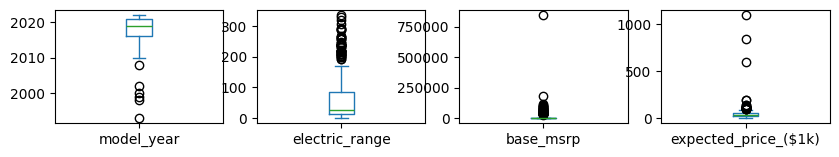

In [282]:
# box plot to visualize outliers
df.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

Do, correlation matrix to see how they relate

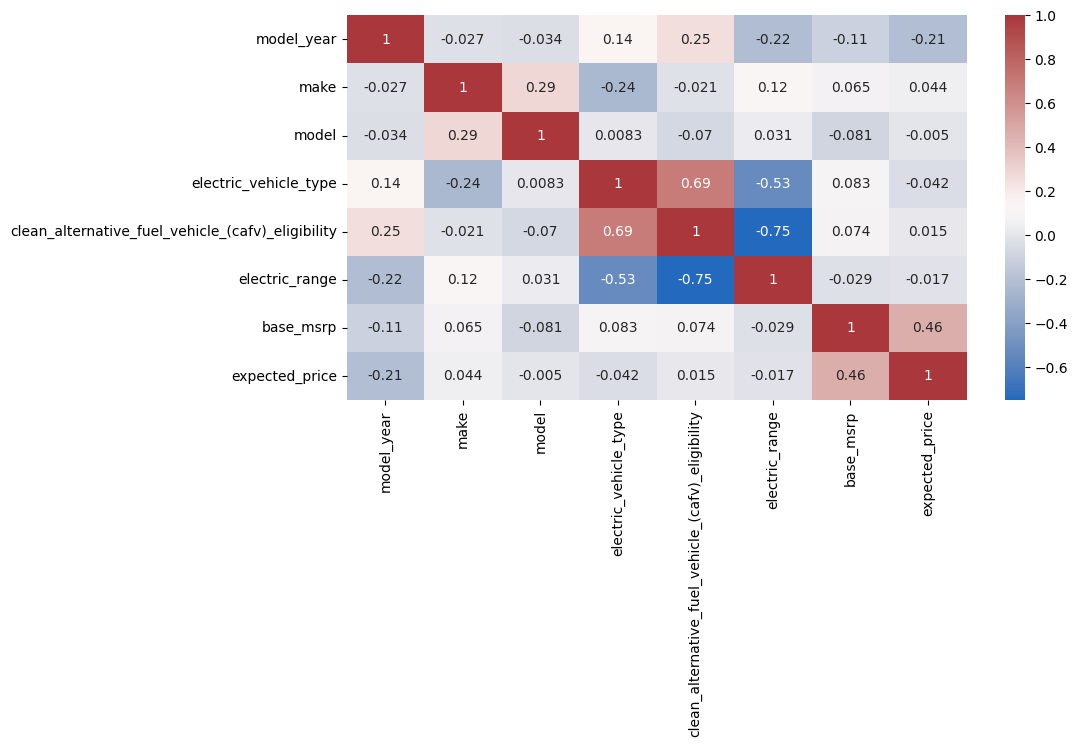

In [296]:
# Checking the correlation of the columns in our data
plt.figure(figsize=(10,5))
sns.heatmap(data = df.corr(), annot=True, cmap='vlag')
plt.show()

In [283]:
# Handling outliers(using capping)

# Calculating lower and upper bounds for each column
lower_bound = numeric_df.quantile(0.05)
upper_bound = numeric_df.quantile(0.95)

# Capping the outliers in each column
df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=0)

In [284]:
# Confirming if outliers have been capped
df_capped.describe()

model_year  electric_range  base_msrp  expected_price_($1k)
count         0.0             0.0        0.0                   0.0
mean          NaN             NaN        NaN                   NaN
std           NaN             NaN        NaN                   NaN
min           NaN             NaN        NaN                   NaN
25%           NaN             NaN        NaN                   NaN
50%           NaN             NaN        NaN                   NaN
75%           NaN             NaN        NaN                   NaN
max           NaN             NaN        NaN                   NaN

data preprocessing

In [285]:
# Renaming the expected_price column column
df.rename(columns={'expected_price_($1k)': 'expected_price'}, inplace=True)

In [286]:
df.columns

Index(['model_year', 'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'expected_price'],
      dtype='object')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 60381
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   model_year                                         370 non-null    float64
 1   make                                               370 non-null    object 
 2   model                                              370 non-null    object 
 3   electric_vehicle_type                              370 non-null    object 
 4   clean_alternative_fuel_vehicle_(cafv)_eligibility  370 non-null    object 
 5   electric_range                                     370 non-null    int64  
 6   base_msrp                                          370 non-null    int64  
 7   expected_price                                     370 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 34.1+ KB


In [288]:
# label encoding columns

le = LabelEncoder()
cols_columns = ['make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range']

df[cols_columns] = df[cols_columns].apply(lambda col:le.fit_transform(col))

In [289]:
# Define target variable and features
X = df.drop('expected_price', axis=1)  
y = df['expected_price']  # Target 

In [290]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
# Build and Train the SVM Model
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
# Create SVM model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [293]:
# predictions
y_pred = model.predict(X_test)

In [294]:
# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mean squared error: {mse}')
print(f'r2 score: {r2}')

mean squared error: 344.8980519096253
r2 score: 0.16739637185053857
